In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
import time
from datetime import datetime

In [5]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
coordinates = list(lat_lngs)

In [7]:
coordinates

[(-16.566645278774786, -123.19473818467267),
 (-0.10238826738974183, -167.2893546597628),
 (-29.392986575150324, 144.5333740210197),
 (-64.29456869639091, 108.81762474898676),
 (8.08103135441553, -170.39794338530962),
 (-66.85328435715101, 37.65146120965389),
 (31.094742159692643, -19.472899713225104),
 (81.93127704364144, 133.55641848357766),
 (-74.78192718595197, -70.53816072541346),
 (-35.56754448768841, 82.93294676276906),
 (20.47450693871872, -36.98800187008311),
 (35.34052758247539, -137.9559394392399),
 (-21.2027030433877, 56.40529996871237),
 (-11.908304294550277, 97.96540357688957),
 (-9.36459852811197, 122.87027512219964),
 (13.192895561673396, 7.606134590371397),
 (-62.25487180967188, 50.98100709164757),
 (64.29353710703353, 68.79304777146152),
 (-34.236942725069355, 35.036394788332814),
 (87.85914609862294, 117.57705817740987),
 (29.066713483110618, 130.64559434631275),
 (44.398254305996886, -77.24932536454854),
 (55.02797056352304, 125.04497417271187),
 (36.40591573863969,

In [8]:
from citipy import citipy

In [9]:
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | saleaula
City not found. Skipping...
Processing Record 3 of Set 1 | broken hill
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | sainte-rose
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | maumere
Processing Record 15 of Set 1 | katsina
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | aksarka
Processing Record 18 of Set 1 | margate
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | naze
Processing Record 21 of Set 1 | tweed
Processing Record 22 of 

Processing Record 38 of Set 4 | avarua
Processing Record 39 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 40 of Set 4 | horta
Processing Record 41 of Set 4 | the valley
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | tuatapere
Processing Record 45 of Set 4 | rijeka
Processing Record 46 of Set 4 | kazachinskoye
Processing Record 47 of Set 4 | rawah
Processing Record 48 of Set 4 | walvis bay
Processing Record 49 of Set 4 | conakry
Processing Record 50 of Set 4 | broome
Processing Record 1 of Set 5 | vestmannaeyjar
Processing Record 2 of Set 5 | oranjemund
Processing Record 3 of Set 5 | olinda
Processing Record 4 of Set 5 | sabzevar
Processing Record 5 of Set 5 | amderma
City not found. Skipping...
Processing Record 6 of Set 5 | boyolangu
Processing Record 7 of Set 5 | airai
Processing Record 8 of Set 5 | geraldton
Processing Record 9 of Set 5 | oboyan
Processing Record 10 of Set 5 | acapulco
Proc

Processing Record 30 of Set 8 | kaohsiung
Processing Record 31 of Set 8 | mizan teferi
Processing Record 32 of Set 8 | marapanim
Processing Record 33 of Set 8 | tautira
Processing Record 34 of Set 8 | mayna
Processing Record 35 of Set 8 | zalantun
Processing Record 36 of Set 8 | srednekolymsk
Processing Record 37 of Set 8 | sao filipe
Processing Record 38 of Set 8 | lisakovsk
Processing Record 39 of Set 8 | paamiut
Processing Record 40 of Set 8 | babanusah
City not found. Skipping...
Processing Record 41 of Set 8 | kupang
Processing Record 42 of Set 8 | aklavik
Processing Record 43 of Set 8 | port keats
Processing Record 44 of Set 8 | tagusao
Processing Record 45 of Set 8 | kurchum
Processing Record 46 of Set 8 | leshukonskoye
Processing Record 47 of Set 8 | bud
Processing Record 48 of Set 8 | pryazha
Processing Record 49 of Set 8 | ancud
Processing Record 50 of Set 8 | coahuayana
Processing Record 1 of Set 9 | pandan
Processing Record 2 of Set 9 | takoradi
Processing Record 3 of Set 9

Processing Record 21 of Set 12 | gat
Processing Record 22 of Set 12 | abha
Processing Record 23 of Set 12 | okiot
Processing Record 24 of Set 12 | mandalgovi
Processing Record 25 of Set 12 | arapongas
Processing Record 26 of Set 12 | lekoni
Processing Record 27 of Set 12 | point pedro
Processing Record 28 of Set 12 | eureka
Processing Record 29 of Set 12 | burriana
Processing Record 30 of Set 12 | natchitoches
Processing Record 31 of Set 12 | chifeng
Processing Record 32 of Set 12 | klaksvik
Processing Record 33 of Set 12 | irbit
Processing Record 34 of Set 12 | olafsvik
Processing Record 35 of Set 12 | tulu bolo
Processing Record 36 of Set 12 | redwater
Processing Record 37 of Set 12 | kati
Processing Record 38 of Set 12 | churapcha
Processing Record 39 of Set 12 | matagami
Processing Record 40 of Set 12 | nyurba
Processing Record 41 of Set 12 | aksu
Processing Record 42 of Set 12 | opuwo
Processing Record 43 of Set 12 | magnolia
Processing Record 44 of Set 12 | ofunato
Processing Rec

In [17]:
len(city_data)

569

In [18]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,70.29,76,100,24.58,PF,2022-10-20 19:02:51
1,Broken Hill,-31.9500,141.4333,60.78,94,49,4.23,AU,2022-10-20 19:02:51
2,Albany,42.6001,-73.9662,56.91,37,14,1.01,US,2022-10-20 18:59:59
3,Kapaa,22.0752,-159.3190,75.52,82,100,13.80,US,2022-10-20 19:02:52
4,Port Alfred,-33.5906,26.8910,63.18,87,91,1.01,ZA,2022-10-20 19:02:53
5,Ponta Do Sol,32.6667,-17.1000,76.01,84,98,5.08,PT,2022-10-20 19:02:09
6,Ushuaia,-54.8000,-68.3000,41.83,69,88,8.21,AR,2022-10-20 19:01:59
7,Bambous Virieux,-20.3428,57.7575,72.21,76,8,12.75,MU,2022-10-20 19:02:54
8,Fortuna,40.5982,-124.1573,56.32,100,0,10.36,US,2022-10-20 19:02:54
9,Sainte-Rose,16.3324,-61.6979,85.17,74,75,10.36,GP,2022-10-20 19:02:55


In [22]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng',
                            'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-10-20 19:02:51,-23.1203,-134.9692,70.29,76,100,24.58
1,Broken Hill,AU,2022-10-20 19:02:51,-31.9500,141.4333,60.78,94,49,4.23
2,Albany,US,2022-10-20 18:59:59,42.6001,-73.9662,56.91,37,14,1.01
3,Kapaa,US,2022-10-20 19:02:52,22.0752,-159.3190,75.52,82,100,13.80
4,Port Alfred,ZA,2022-10-20 19:02:53,-33.5906,26.8910,63.18,87,91,1.01


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

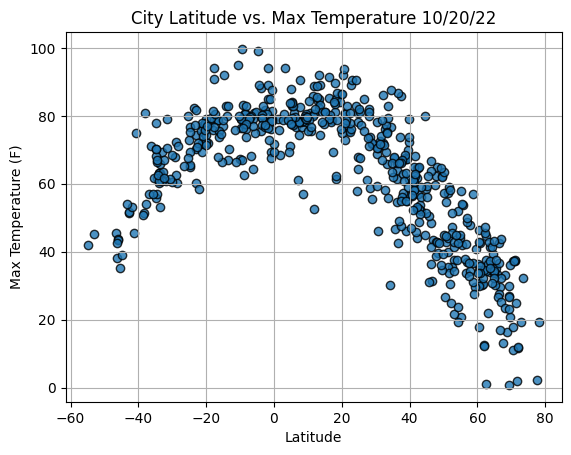

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

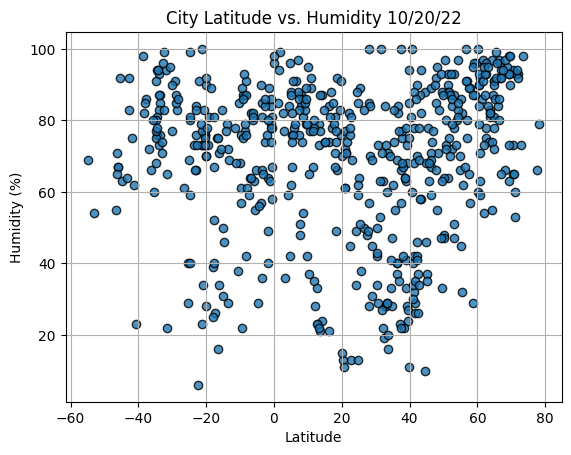

In [26]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

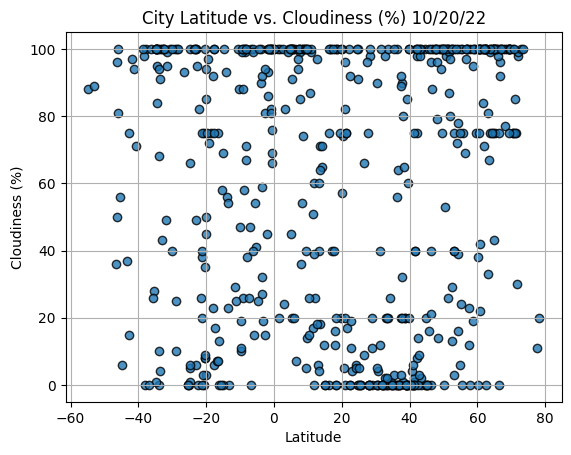

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()